# Data Wrangling dengan Numpy dan Pandas

## Import Library 

In [1]:
# numpy untuk manipulasi data array
import numpy as np
# pandas untuk dataframe
import pandas as pd
# matplotlib.pyplot untuk basic plotting
from matplotlib import pyplot as plt
# seaborn untuk high-level api plotting
import seaborn as sns

## Load Dataset

In [2]:
# menggunakan pd.read_csv() untuk membaca file dan masukkan ke dalam variabel raw_dataset
raw_dataset = pd.read_csv(r"german_credit_data.csv")

# melihat isi dari raw_dataset
raw_dataset

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,NaN,NaN,9055,36,education,good
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,7,35,male,3,rent,little,moderate,6948,36,car,good
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


## Inspeksi Data

In [3]:
# Cek nama kolom yang ada pada dataset
raw_dataset.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [4]:
# Cek dimensi dari data
raw_dataset.shape

(1000, 11)

In [5]:
# melihat info lainnya
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.0+ KB


In [6]:
# melihat summary dari data
raw_dataset.describe(include='all')

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000,1000
unique,NaN,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,NaN,690,NaN,713,603,274,NaN,NaN,337,700
mean,499.500000,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,288.819436,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,0.000000,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,249.750000,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,499.500000,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,749.250000,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


In [7]:
# drop 'unnamed: 0' column
raw_dataset = raw_dataset.drop(columns=['Unnamed: 0'])

In [8]:
# Melihat mean dari semua data bertipe numerik
raw_dataset.select_dtypes('number').mean()

Age                35.546
Job                 1.904
Credit amount    3271.258
Duration           20.903
dtype: float64

In [9]:
# cek nilai yang hilang untuk masing-masing kolom
raw_dataset.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [13]:
# ambil kolom data kategorik
kolom_data_kategorik = raw_dataset.select_dtypes('object').columns

# cek nilai unik dari tiap kategori
for kolom in kolom_data_kategorik:
    print("kolom: " + kolom)
    print(raw_dataset[kolom].value_counts())

kolom: Sex
male      690
female    310
Name: Sex, dtype: int64
kolom: Housing
own     713
rent    179
free    108
Name: Housing, dtype: int64
kolom: Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64
kolom: Checking account
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64
kolom: Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
Name: Purpose, dtype: int64
kolom: Risk
good    700
bad     300
Name: Risk, dtype: int64


# Cek Konsistensi Tipe Data

Cek beberapa variabel, karena bisa jadi ada variabel yang secara tipe harusnya kategorik tapi dianggap sebagai numerik/angka dan sebaliknya

In [18]:
# cek tipe data sebelum diubah
raw_dataset.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [19]:
# lihat tipe data untuk kolom Job
print(raw_dataset['Job'].dtypes)
# lihat kolom 'Job'
raw_dataset[['Job']]

int64


,Job
0,2
1,2
2,1
3,2
4,2
5,1
6,2
7,3
8,1
9,3


In [20]:
# Ubah tipe data kolom 'Job' menjadi 'Category'
raw_dataset.Job = raw_dataset.Job.astype('category')

# Cek Apakah Kelas Target Seimbang atau Tidak

In [21]:
# hitung tiap kategori pada kolom 'Risk'
raw_dataset['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [22]:
# hitung tiap kategori pada kolom 'Risk' dalam proporsi
raw_dataset['Risk'].value_counts(normalize=True)

good    0.7
bad     0.3
Name: Risk, dtype: float64

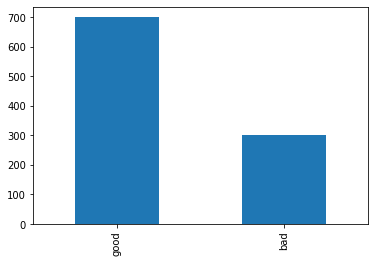

In [10]:
# visualisasi dengan menggunakan bar plot dengan pandas-plot
raw_dataset['Risk'].value_counts().plot.bar();

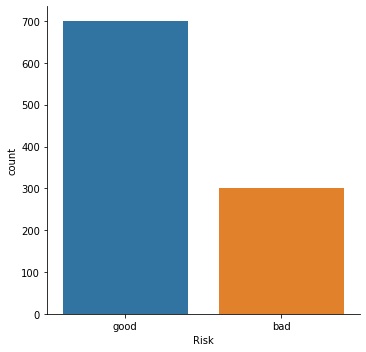

In [11]:
# visualisasi barplot dengan seaborn
sns.catplot(x='Risk', kind='count', data=raw_dataset);

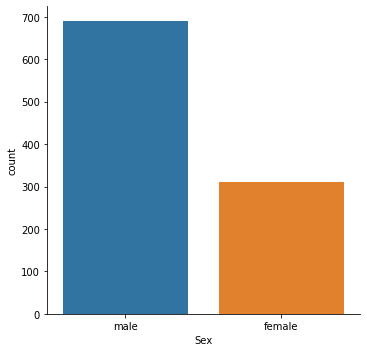

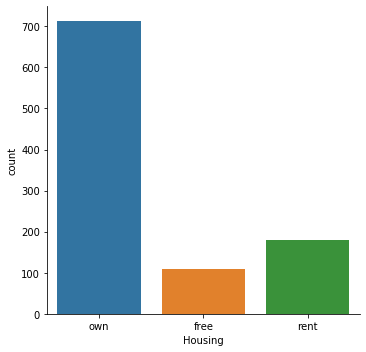

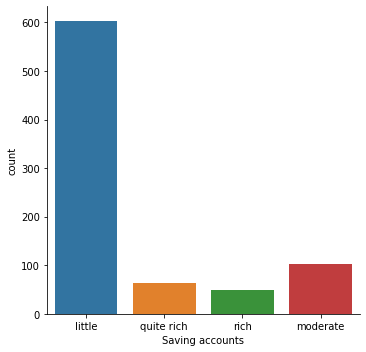

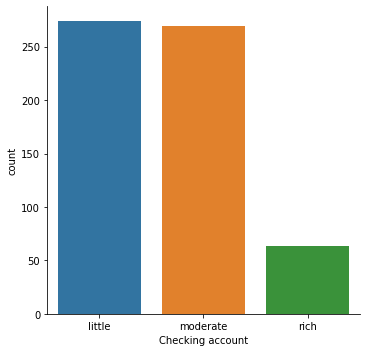

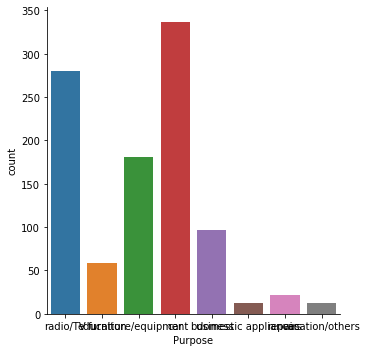

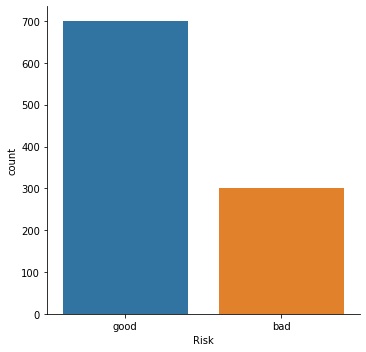

In [14]:
# plot semua variabel bertipe kategorik dengan barchart
for kolom in kolom_data_kategorik:
    sns.catplot(kolom, kind='count', orient='v', data=raw_dataset);

# Cek Bentuk Distribusi dari Data Numerik

## Menggunakan Histogram dan Kernel Density Plot

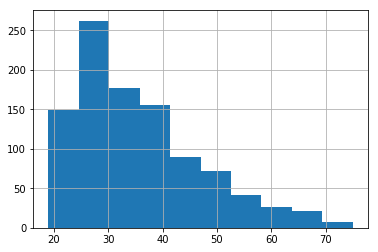

In [24]:
# melihat distribusi dari 'Age' menggunakan method hist()
raw_dataset['Age'].hist();

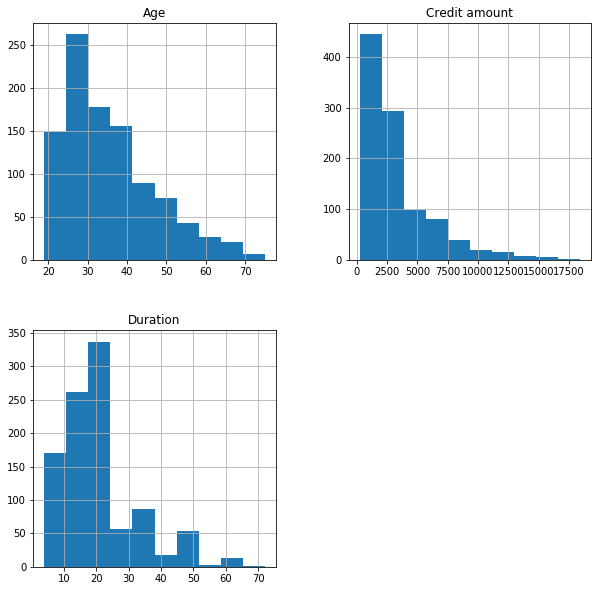

In [45]:
# melihat distribusi semua variabel numerik dengan method hist()
raw_dataset.select_dtypes('number').hist(figsize=(10,10));

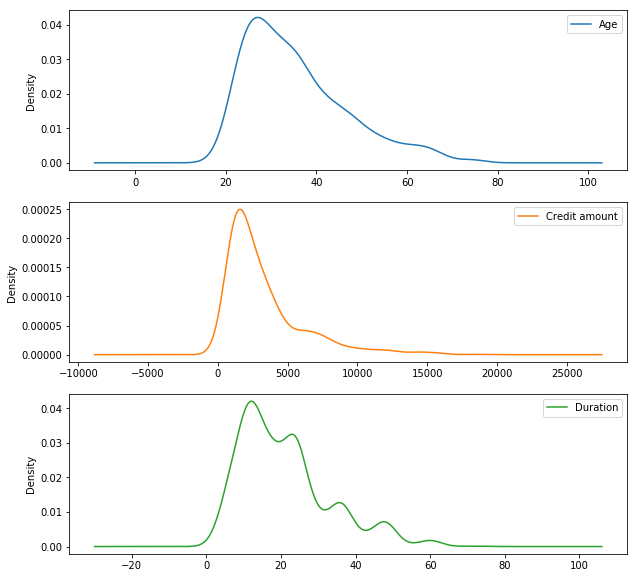

In [60]:
# membuat density plot dengan menggunakan method kde()
raw_dataset.select_dtypes('number').plot.kde(subplots=True, sharex=False, figsize=(10,10));

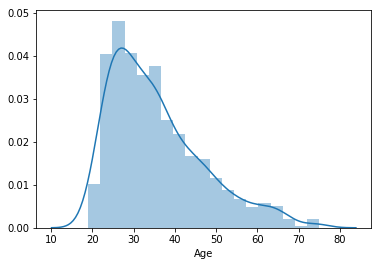

In [91]:
# membuat distribution plot dengan seaborn
sns.distplot(raw_dataset['Age']);

## Menggunakan Box Plot, Boxen Plot & Violin Plot

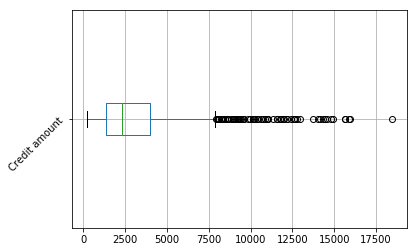

In [87]:
# Membuat boxplot vertikal untuk kolom 'Credit amount' dengan method boxplot()
raw_dataset[['Credit amount']].boxplot(rot=45, vert=False);

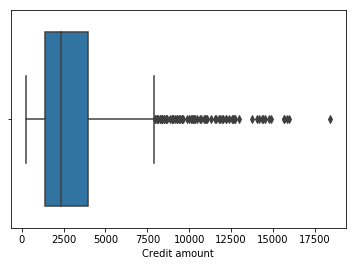

In [86]:
# membuat boxplot untuk kolom 'Credit amount' dengan method boxplot pada seaborn
sns.boxplot(x='Credit amount', data=raw_dataset);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


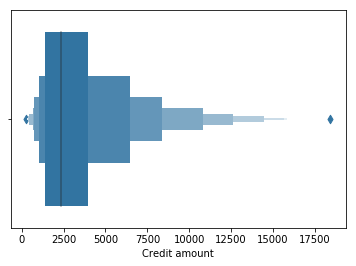

In [85]:
# membuat boxen plot untuk kolom 'Credit amount' dengan method boxenplot pada seaborn
sns.boxenplot(x='Credit amount', data=raw_dataset);

/home/qti/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


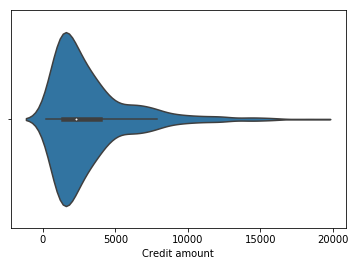

In [88]:
# membuat violin plot untuk 'Credit amount' dengan method violinplot pada seaborn
sns.violinplot(x='Credit amount', data=raw_dataset);

# Bagaimana Kaitan Antar Variabel?

## Antara Variabel Numerik

Untuk memvisualisasikan kaitan antara variabel numerik dapat menggunakan scatterplot

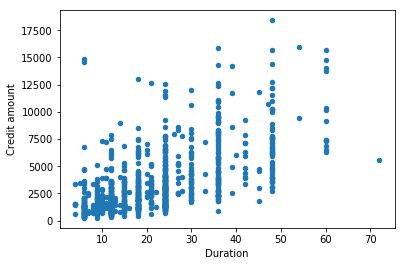

In [25]:
# menggunakan method scatter()
raw_dataset.plot.scatter(x='Duration', y='Credit amount');

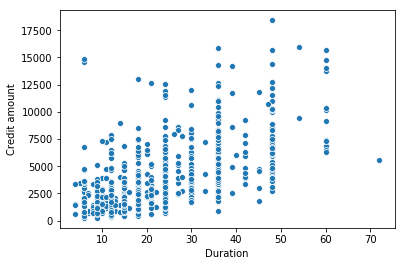

In [26]:
# menggunakan method scatterplot pada seaborn
sns.scatterplot(x='Duration', y='Credit amount', data=raw_dataset);

/home/qti/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


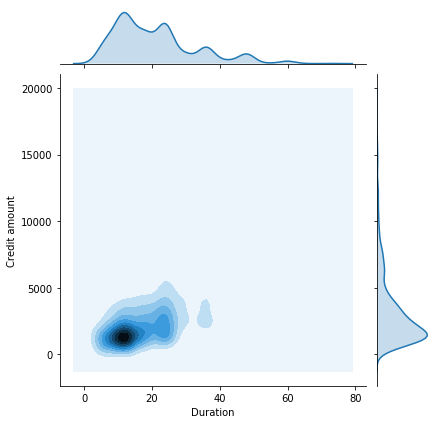

In [27]:
sns.jointplot(x='Duration', y='Credit amount', data=raw_dataset, kind='kde');

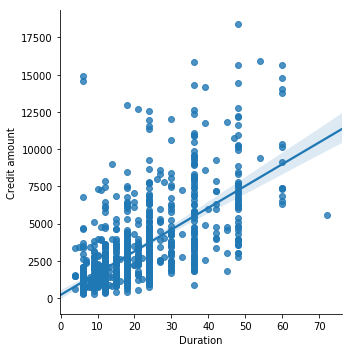

In [28]:
sns.lmplot(x='Duration', y='Credit amount', data=raw_dataset);

Untuk membuat *correlation plot*, kita dapat menggunakan method ```pairplot``` dari seaborn.

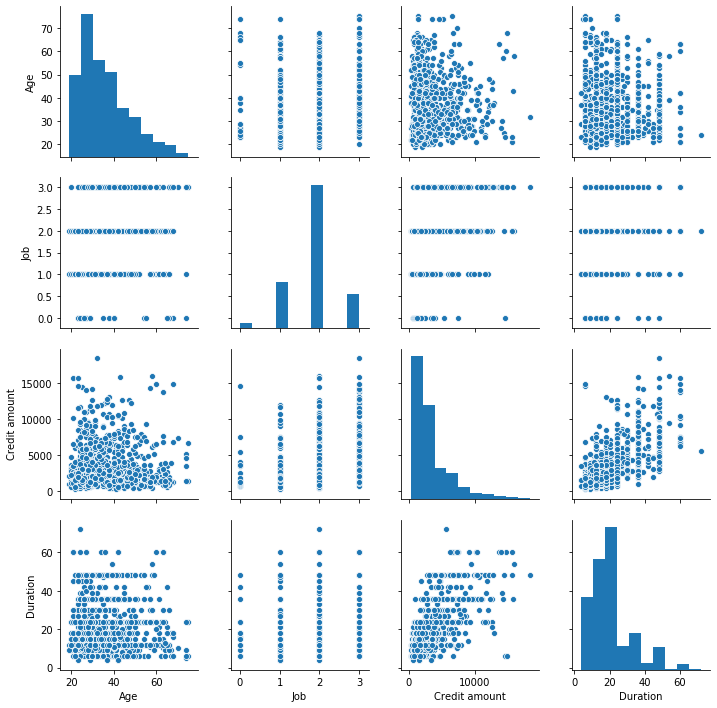

In [16]:
# menggunakan method pairplot dari seaborn
sns.pairplot(raw_dataset);

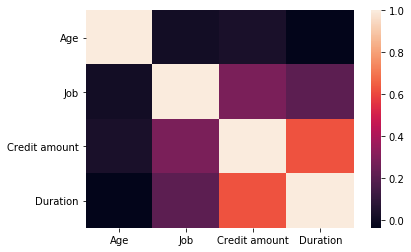

In [15]:
# membuat matrik korelasi dengan method heatmap pada seaborn
sns.heatmap(raw_dataset.select_dtypes('number').corr());

## Antara Variabel Numerik dan Kategorik

Untuk Menampilkan kaitan antara variabel numerik dan kategorik, kita dapat menggunakan beberapa plot berikut:

- violinplot 
- boxplot
- barplot
- pairplot
- catplot
- scatterplot/lmplot

Kaitan antara variabel "Job" dengan "Credit amount" untuk tiap "Risk"

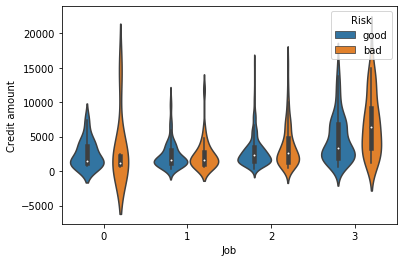

In [17]:
# menggunakan violinplot
sns.violinplot(x='Job', y='Credit amount', hue = 'Risk', data=raw_dataset);

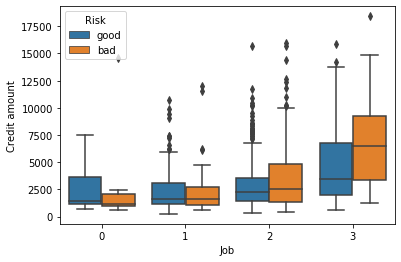

In [18]:
# menggunakan boxplot
sns.boxplot(x='Job', y='Credit amount', hue = 'Risk', data=raw_dataset);

Kaitan antara variabel "Sex" dengan "Credit amount" untuk tiap "Risk"

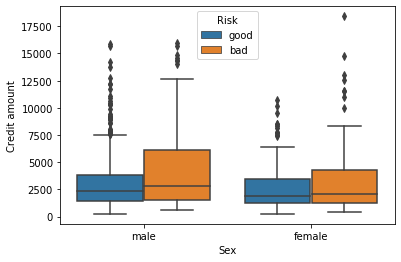

In [19]:
sns.boxplot(x='Sex', y='Credit amount', hue='Risk', data=raw_dataset);

Kaitan antara variabel "Risk", "Credit amount", dan "Housing"

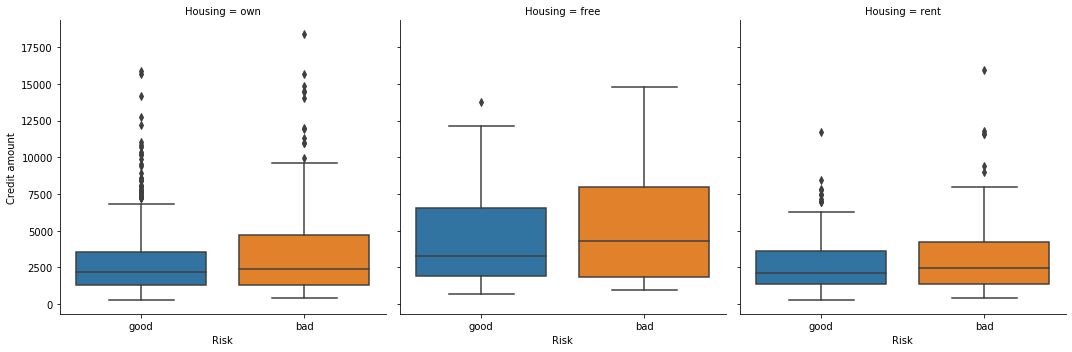

In [22]:
sns.catplot(x='Risk', y='Credit amount', col='Housing', kind="box", data=raw_dataset);

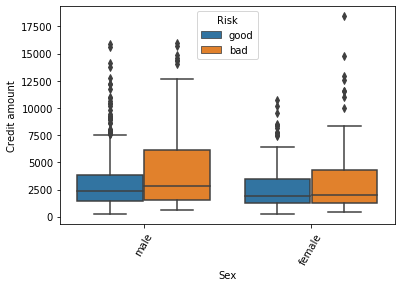

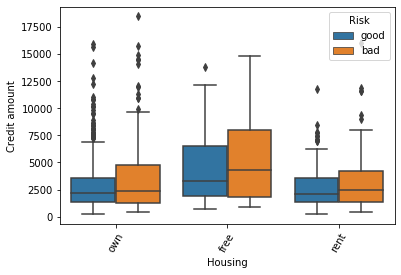

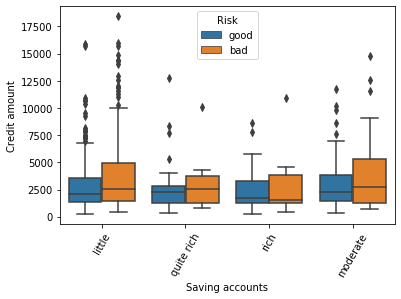

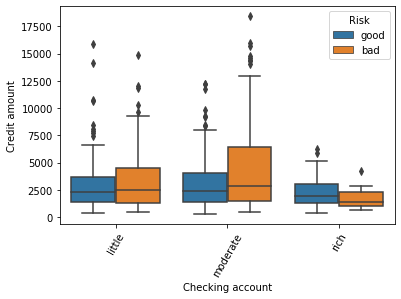

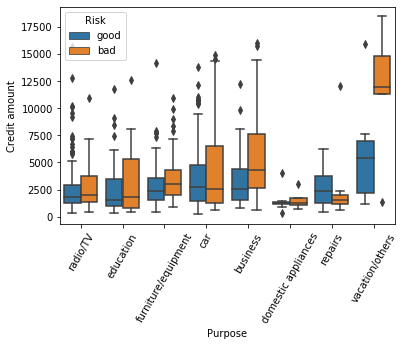

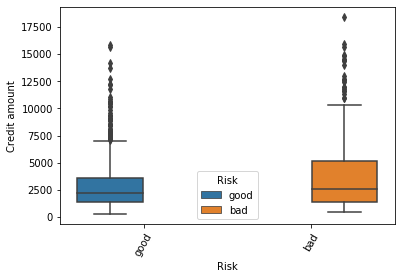

In [24]:
for kolom in kolom_data_kategorik:
    plt.figure()
    sns.boxplot(x=kolom, y='Credit amount', hue='Risk', data=raw_dataset)
    plt.xticks(rotation=60)

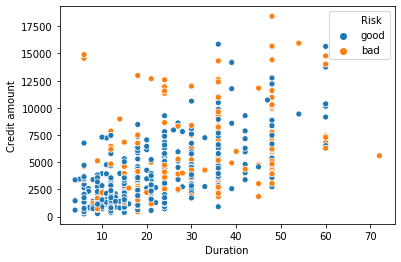

In [25]:
sns.scatterplot(x='Duration', y='Credit amount', hue='Risk', data=raw_dataset);

Kaitan antara setiap variabel numerik dengan "Risk"

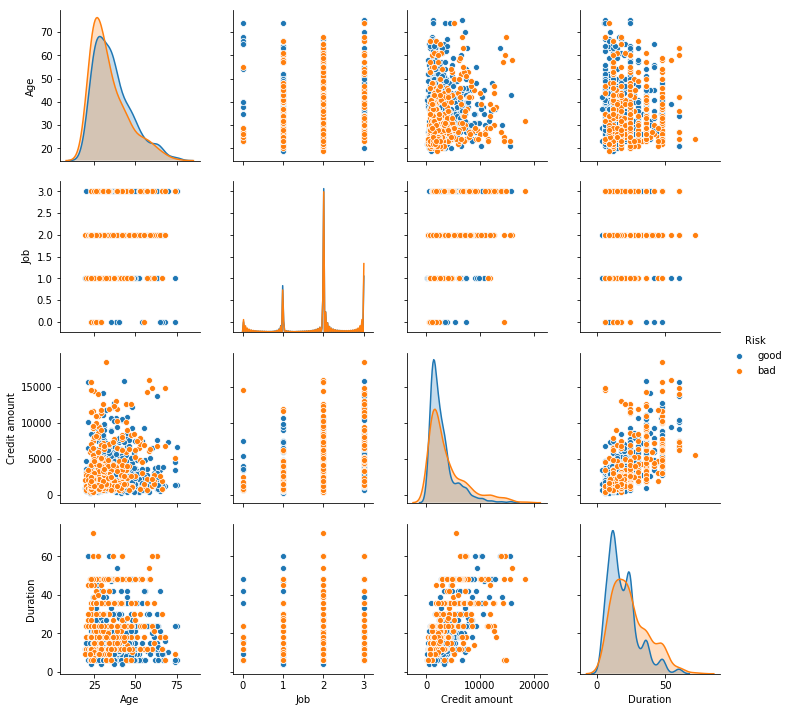

In [97]:
sns.pairplot(raw_dataset, hue='Risk');

## Antara Variabel Kategorik

Kaitan antara variabel "Sex" dengan variabel "Risk"

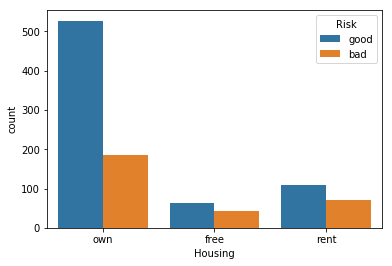

In [110]:
sns.countplot(x='Housing', hue='Risk', data=raw_dataset);

Kaitan antara variabel "Housing" dengan "Risk"

In [132]:
pd.crosstab(raw_dataset['Housing'], raw_dataset['Risk'])

Risk,bad,good
Housing,,
free,44,64
own,186,527
rent,70,109
